### **Import required libraries:**
To start, we have to import the necessary libraries such as OpenCV, Numpy, and Matplotlib. You can install them using pip, if not already installed.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### **Load the image or video:** 
The first step is to load the image or video on which we will perform lane detection.I'm using OpenCV's cv2.imread() function to load an image.

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Data/Detection_of_Road_Lane_Lines/test_img.jpg')

### **Preprocessing:**
 **Before lane detection, we have to preprocess the image. Some of the preprocessing techniques are:**

* Convert the image to grayscale.
* Apply Gaussian blur to the image.
* Apply Canny edge detection to find the edges in the image.

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)

error: ignored

### **Region of interest:** 
we only need to detect the lanes on the road. Therefore, we need to define a region of interest (ROI) on the image.

In [ ]:
height = img.shape[0]
width = img.shape[1]
region_of_interest_vertices = [(0, height), (width / 2, height / 2), (width, height)]

mask = np.zeros_like(edges)
cv2.fillPoly(mask, np.array([region_of_interest_vertices], np.int32), 255)
masked_edges = cv2.bitwise_and(edges, mask)


AttributeError: ignored

### **Hough transform:**
 Hough transform is a technique to detect lines in an image. We can use OpenCV's cv2.HoughLinesP() function to perform Hough transform.

In [ ]:
lines = cv2.HoughLinesP(masked_edges, rho=6, theta=np.pi/60, threshold=160, lines=np.array([]), minLineLength=40, maxLineGap=25)

### **Draw the lines:**
Once we have detected the lines using Hough transform, we can draw them on the original image using OpenCV's cv2.line() function.

In [ ]:
line_image = np.zeros_like(img)

for line in lines:
    x1, y1, x2, y2 = line.reshape(4)
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

lane_image = cv2.addWeighted(img, 0.8, line_image, 1, 1)


### **Display the final output:** 
Finally, you can display the output using Matplotlib's plt.imshow() function.

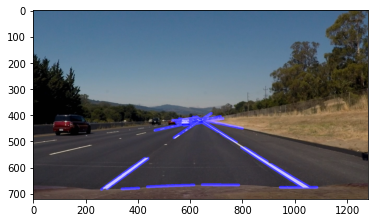

In [ ]:
plt.imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
plt.show()